In [47]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
##load all packages
import anndata
import collections
import numpy as np
import pandas as pd
import scanpy as sc
import MACA as maca
import seaborn as sns
from glob import iglob
import scrublet as scr
import scanpy.external as sce
import scvelo as scv
#import scrublet as scr # requires 'pip install scrublet'
import os
import sklearn
import bbknn
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80,dpi_save=800)  # low dpi (dots per inch) yields small inline figures

-----
anndata     0.8.0
scanpy      1.9.1
-----
MACA                        NA
PIL                         9.0.1
annoy                       NA
asttokens                   NA
backcall                    0.2.0
bbknn                       NA
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.4
cairo                       1.21.0
cffi                        1.15.0
cloudpickle                 2.0.0
colorama                    0.4.4
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.11.0
dask                        2022.02.1
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
executing                   0.8.3
fontTools                   4.25.0
fsspec                      2022.02.0
google                      NA
h5py                        3.6.0
igraph                      0.9.11
ipykernel                   6.9.1
ipython_ge

In [48]:
adata = sc.read_h5ad('./cache/scRNA_qc.h5ad')
mac2 = sc.read_h5ad('./cache/scRNA_cnv.h5ad')
mac1=mac2[mac2.obs['cell type'].isin(['Monocytes'])]
mac=adata[adata.obs.index.isin(mac1.obs.index)]

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:03)


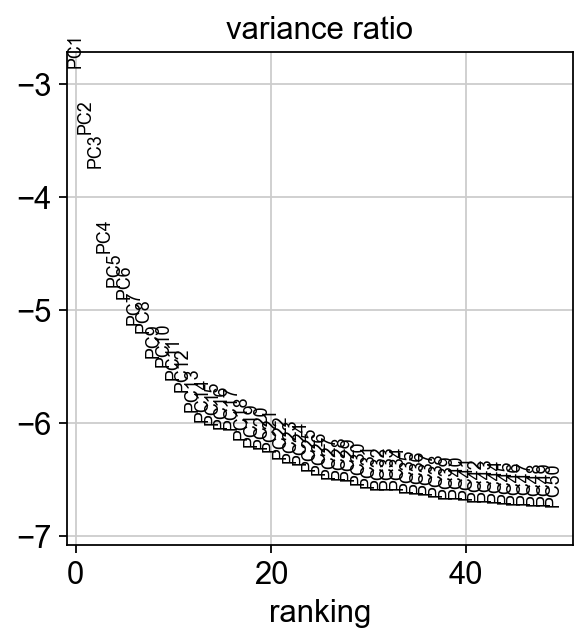

<AxesSubplot:>

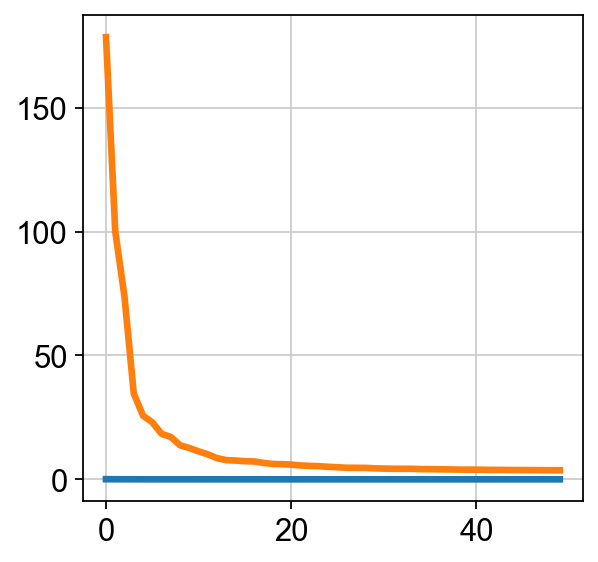

In [52]:
sc.pp.normalize_total(mac, target_sum=1e4)
sc.pp.log1p(mac)
sc.tl.pca(mac, svd_solver='arpack')
sc.pl.pca_variance_ratio(mac, log=True,n_pcs = 50)
sns.lineplot(data = mac.uns['pca']['variance_ratio'],palette= 'tab10',linewidth = 3)
mac.uns['pca']['variance']
sns.lineplot(data =mac.uns['pca']['variance'],palette='tab10',linewidth = 3)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
neighbors的数值为：10


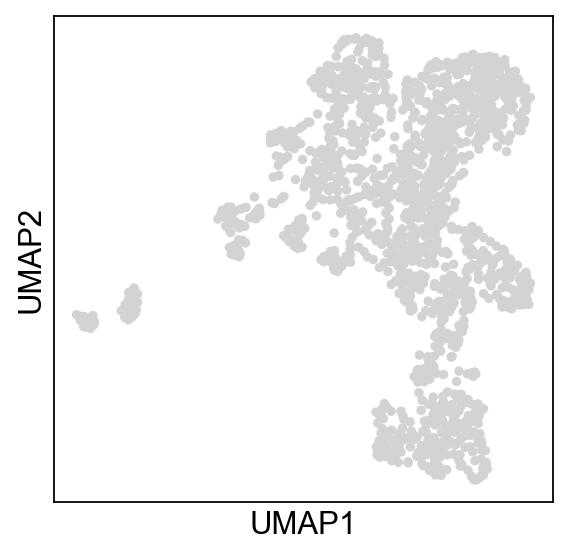

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
neighbors的数值为：15


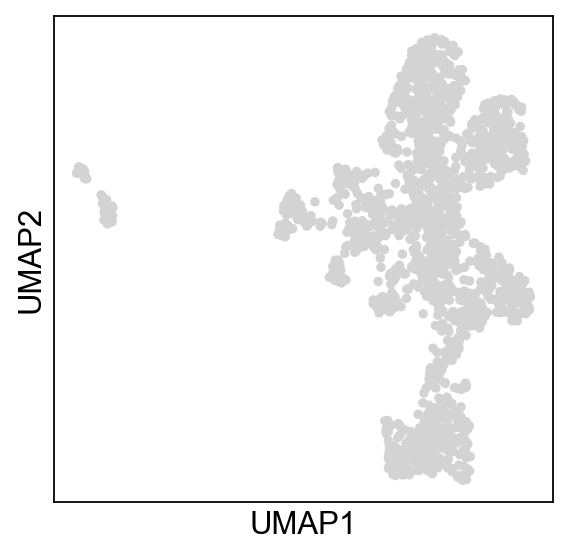

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：20


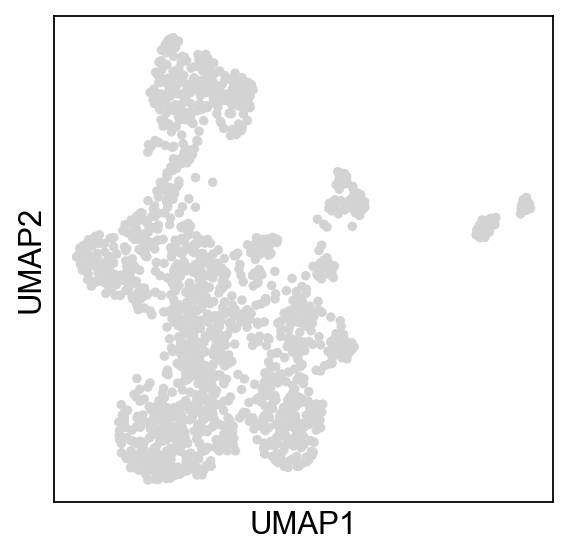

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：25


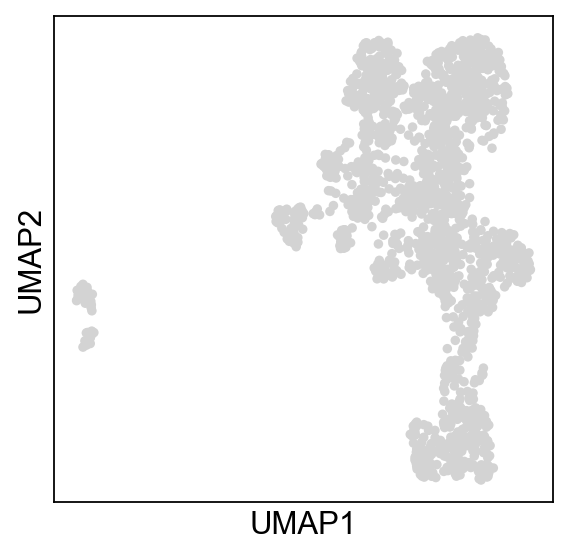

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：30


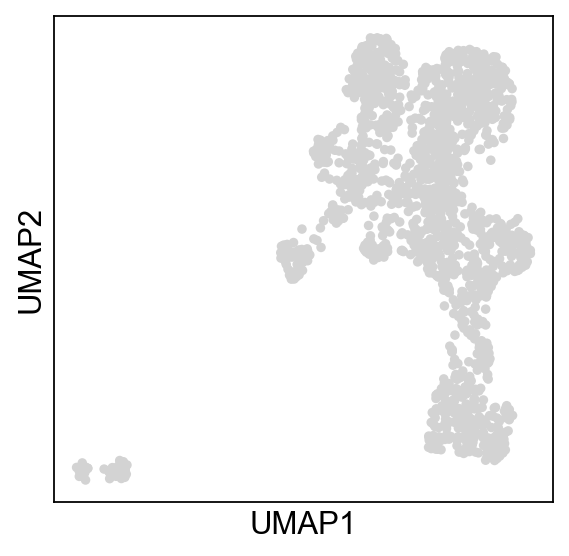

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：35


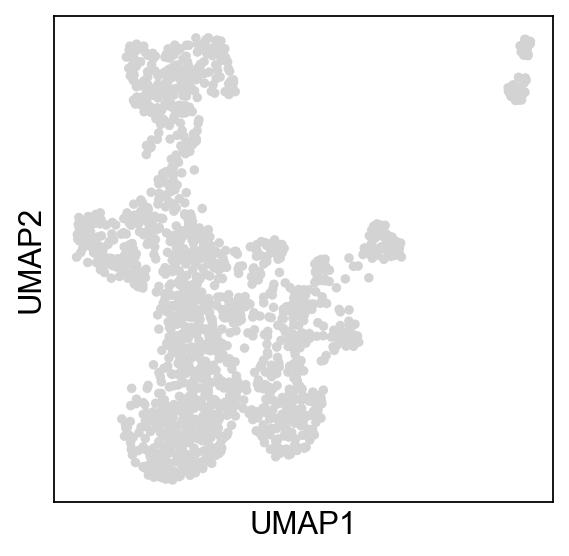

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：40


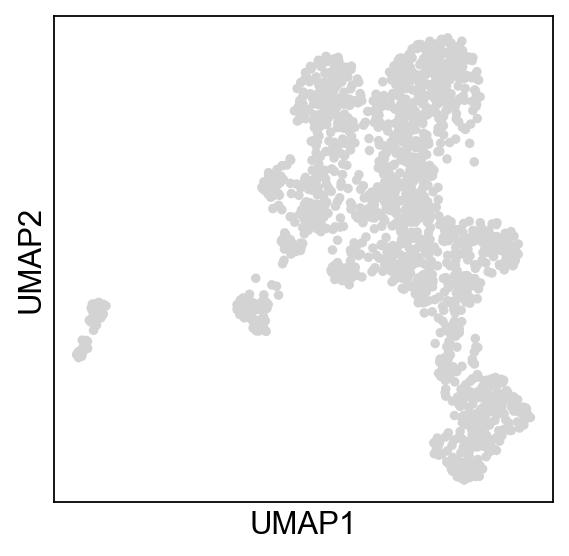

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：45


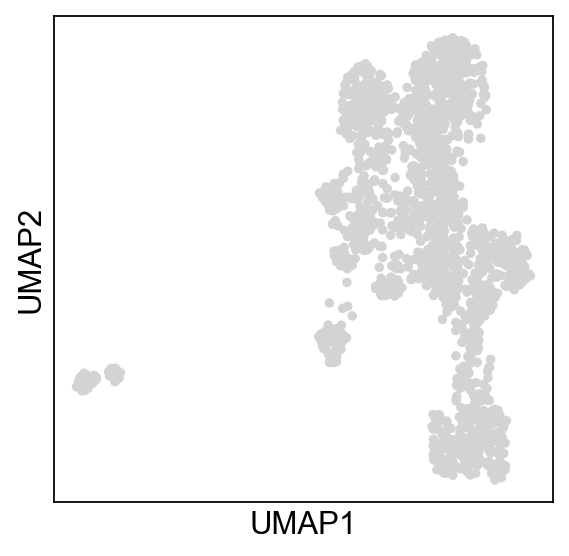

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：50


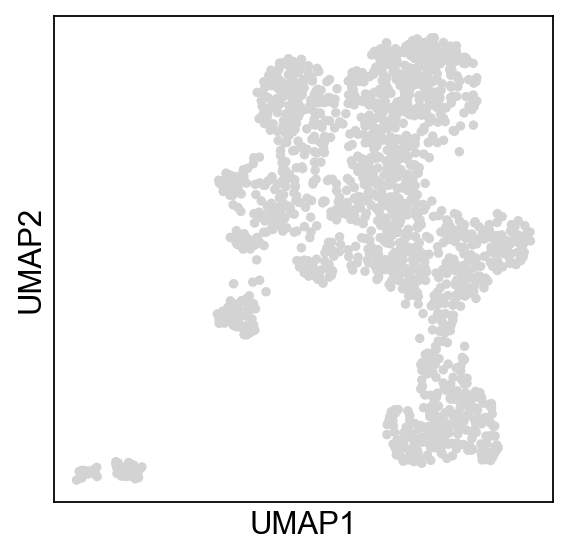

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：55


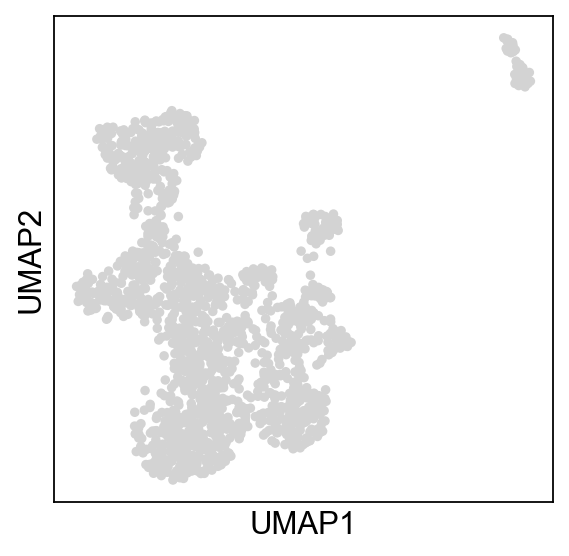

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：60


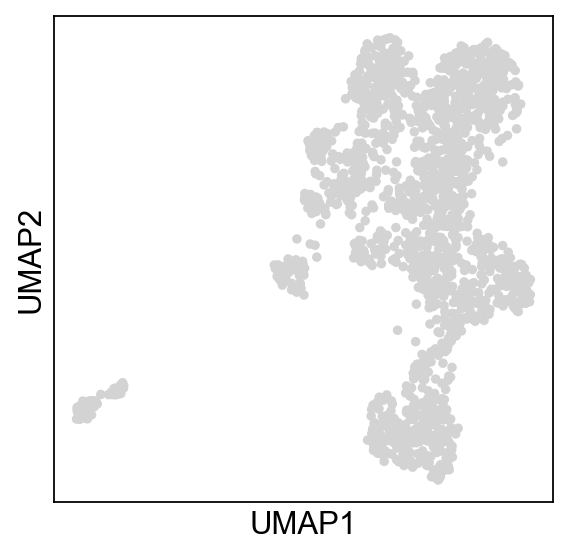

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：65


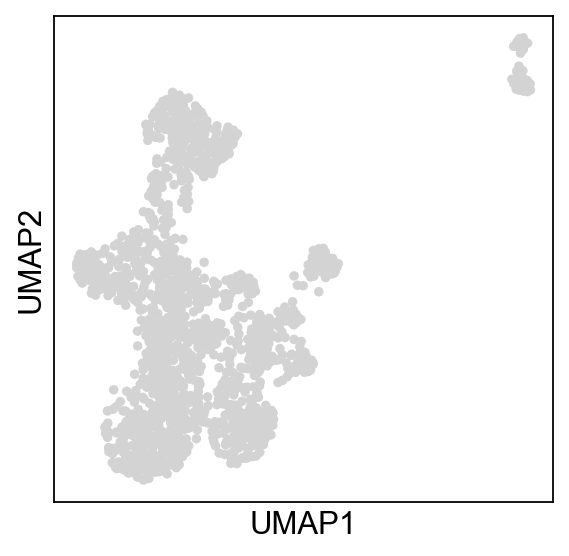

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
neighbors的数值为：70


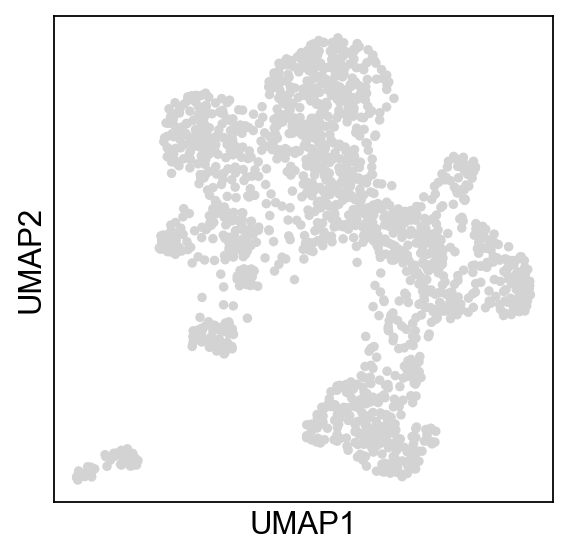

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：75


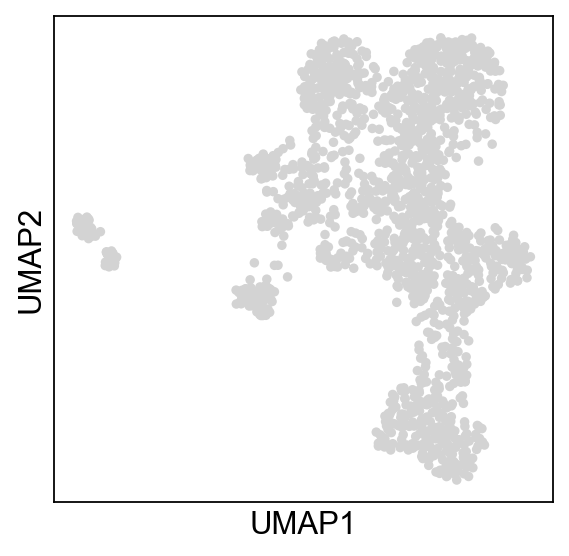

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：80


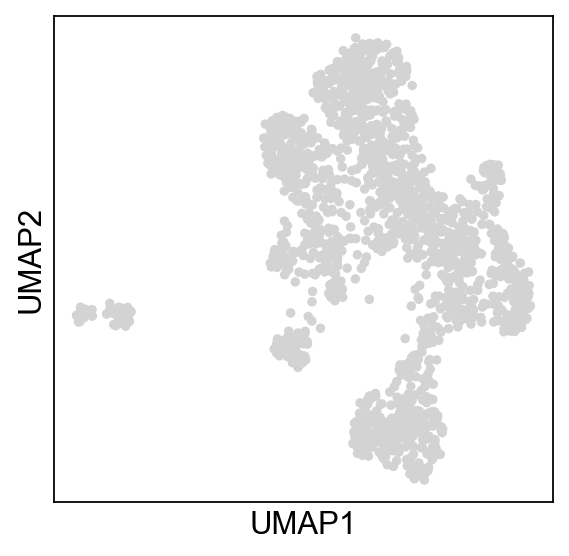

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
neighbors的数值为：85


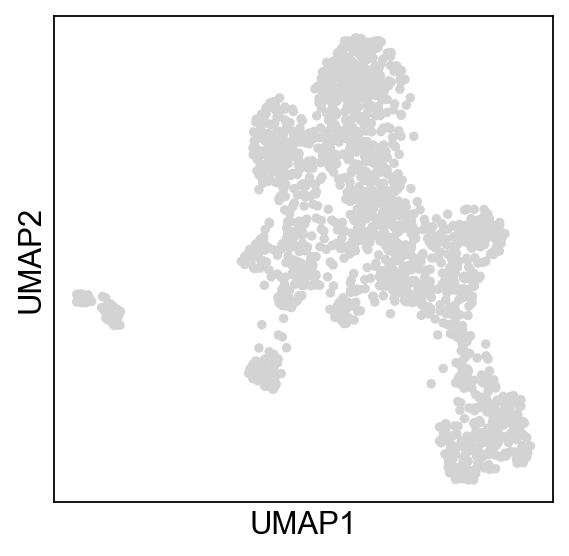

In [53]:
for i in range(10,90,5):
    sc.pp.neighbors(mac,n_pcs=20, n_neighbors= i)
    sc.tl.umap(mac)
    print(f'neighbors的数值为：{i}')
    sc.pl.umap(mac)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


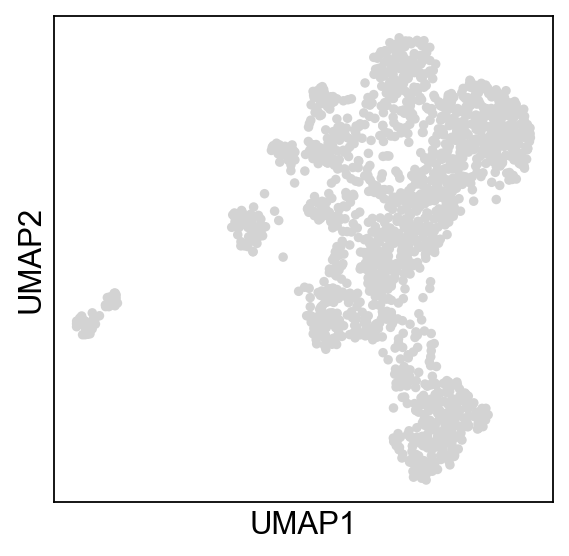

In [54]:
sc.pp.neighbors(mac,n_pcs=40, n_neighbors= 70)
sc.tl.umap(mac)
sc.pl.umap(mac)

In [57]:
for i in range(1,16):
    sc.tl.leiden(mac,resolution=round(i*0.1,1),key_added=f'cluster_{round(i*0.1,1)}')

running Leiden clustering
    finished: found 4 clusters and added
    'cluster_0.1', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'cluster_0.2', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'cluster_0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'cluster_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'cluster_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 9 clusters and added
    'cluster_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'cluster_0.7', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clus

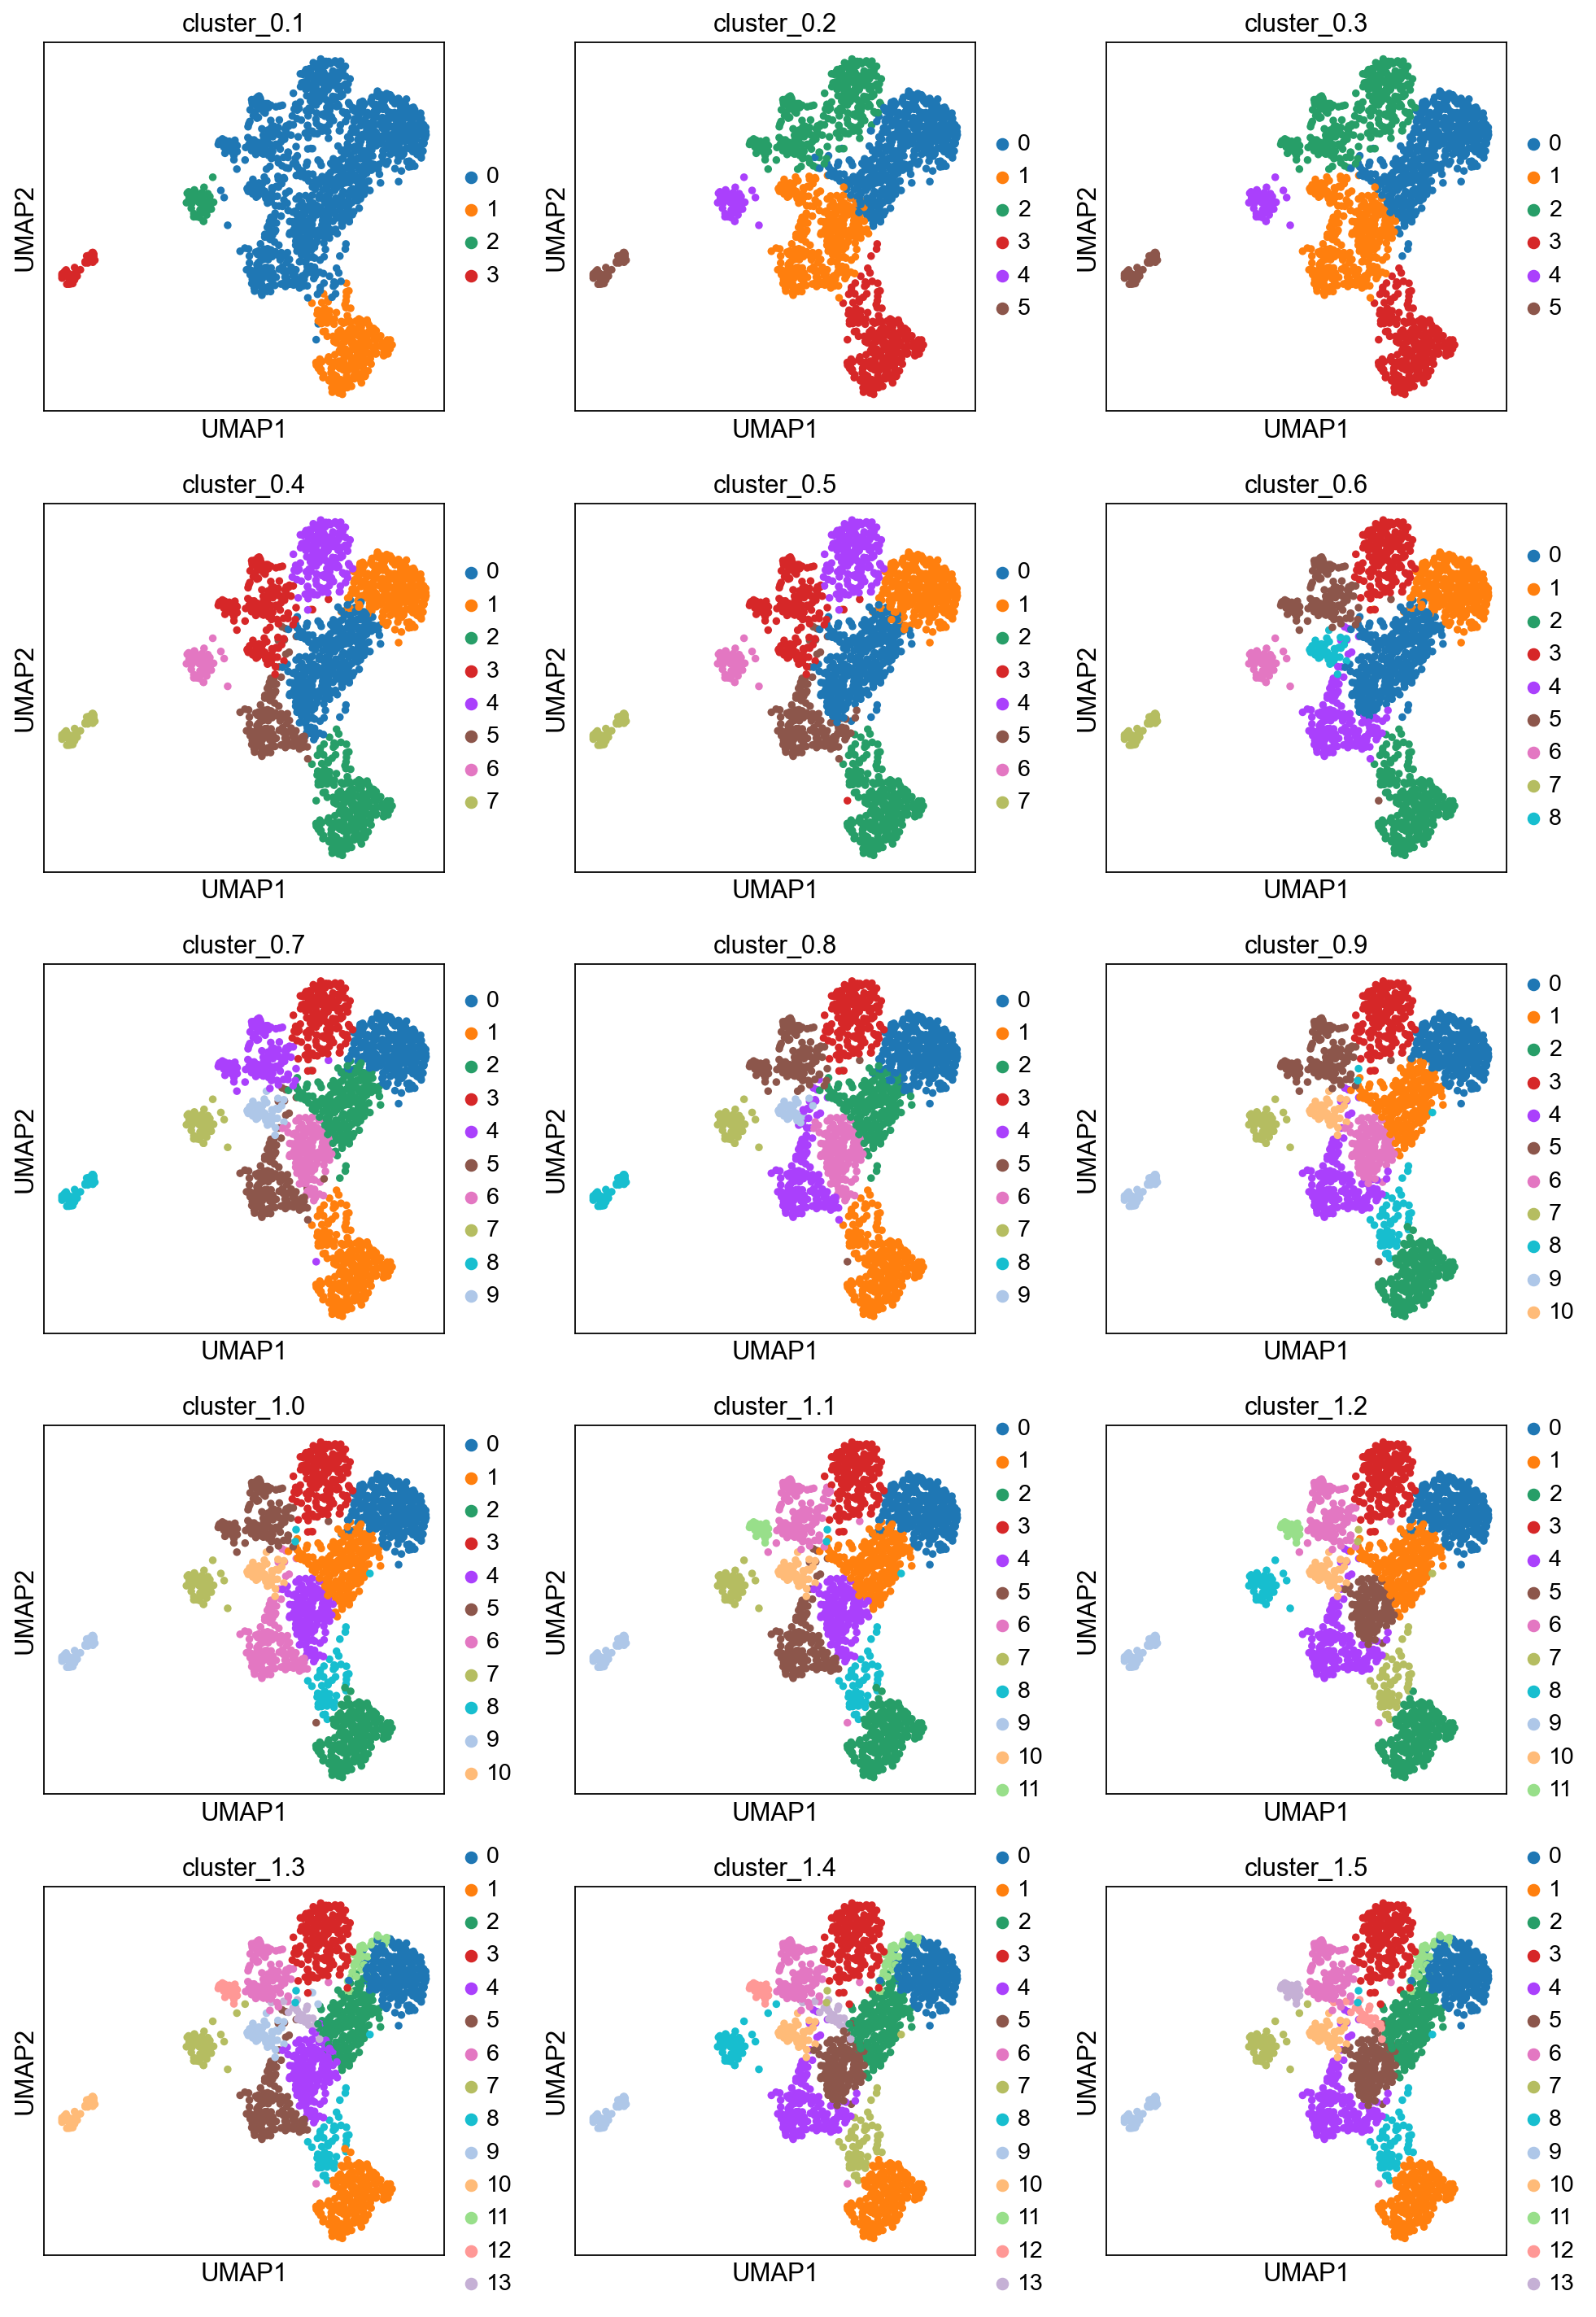

In [58]:
sc.pl.umap(mac,color = [f'cluster_{round(i*0.1,1)}' for i in range(1,16)],ncols = 3,save='mac_allcluster.pdf')

In [ ]:
sc.tl.rank_genes_groups(mac,'cluster_0.8',method='wilcoxon')
sc.pl.rank_genes_groups(mac, n_genes=25, sharey=False)

In [ ]:
pd.DataFrame(mac.uns['rank_genes_groups']['names']).head(10)

In [12]:
pg_df = pd.read_table("./00.data/PanglaoDB_markers_27_Mar_2020.tsv")
##remove mouse specific genes
pg_df = pg_df[pg_df['species']!='Mm']
cell_markers = {}##cell_marker is dictionary that contains names of cell types and their marker genes
marker_list = []
for i in list(set(pg_df["cell type"].values.tolist())):
    genes = pg_df[pg_df["cell type"]==i]['official gene symbol'].values.tolist()
    ##only use cell type with at least 5 genes and less than 300 genes
    if len(genes)>=5 and len(genes)<=300:
        cell_markers[i]=genes
        marker_list+= genes
marker_list = list(set(marker_list))
marker_list = [i for i in marker_list if i in adata.var.index]
len(marker_list)

4045

In [14]:
ad = mac.copy()
ad = ad[:,marker_list]

##run MACA
ad, annotation = maca.singleMACA(ad=ad, cell_markers=cell_markers,
                                 res=[1,1.5,2],n_neis=[3,5,12])

(1637, 168)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 22 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using 

In [15]:
ad.obs['Annotation']=np.array(annotation)
#map注释结果到leiden分类中
mac.obs['MACA']=ad.obs['Annotation']

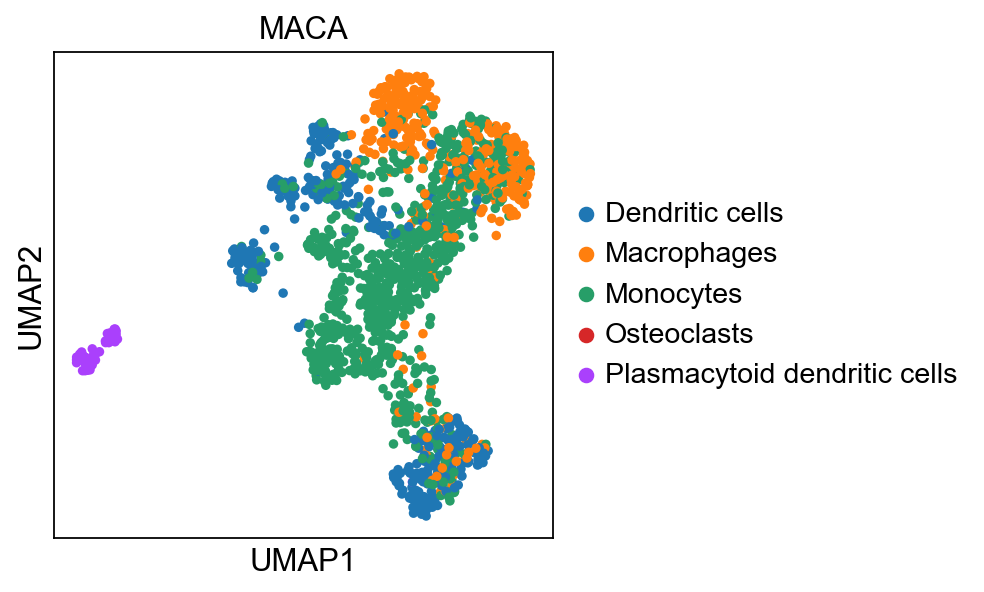

In [21]:
sc.pl.umap(mac, color=['MACA'])

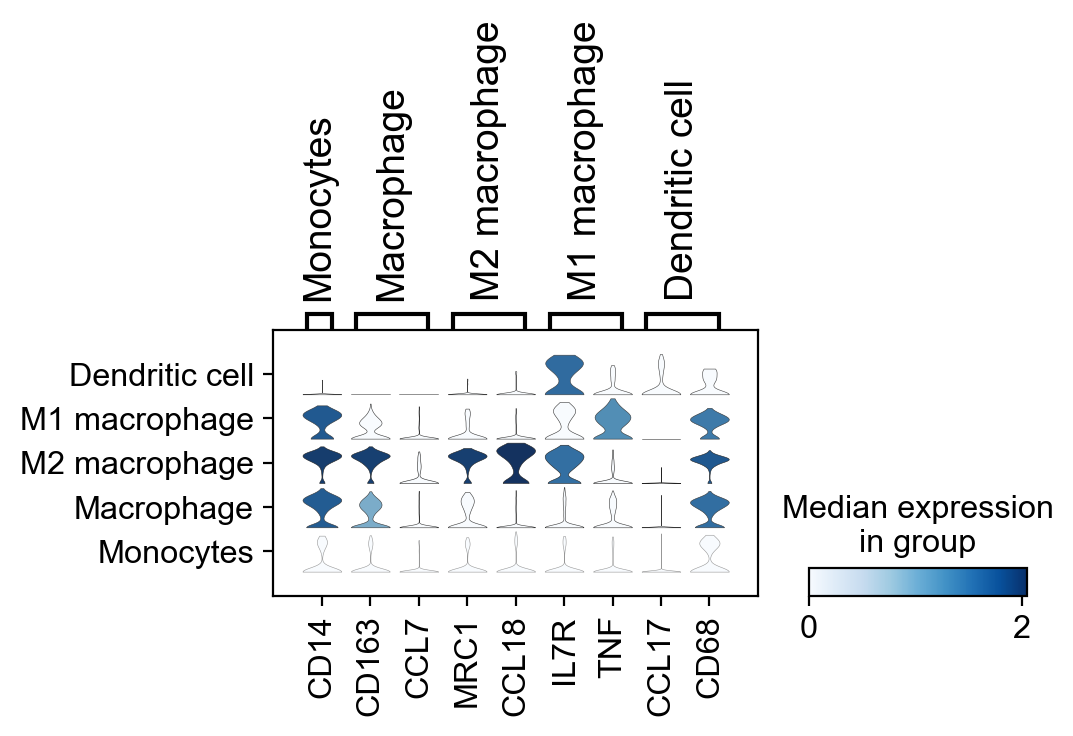

In [46]:
cluster = {
    'Monocytes':["CD14"],
    'Macrophage':["CD163","CCL7"],
    'M2 macrophage':["MRC1","CCL18"],
    'M1 macrophage':["IL7R","TNF"],
    'Dendritic cell':['CCL17',"CD68"]
}
sc.pl.stacked_violin(mac, cluster, groupby='cell type', swap_axes=False,save='Macrophage_marker.pdf')

In [59]:
def annot_prelim(adata_obj, barcode):
    curr_louvain_coarse = adata_obj.obs.loc[barcode,'cluster_0.8']
    if curr_louvain_coarse in ['2','3','5','6','9']:
        return('Macrophage')
    elif curr_louvain_coarse in ['0']:
        return('M2 macrophage')
    elif curr_louvain_coarse in ['4']:
        return('M1 macrophage')
    elif curr_louvain_coarse in ['7','8']:
        return('Dendritic cell')
    else:
        return('Monocytes')

In [60]:
mac.obs['barcode'] = mac.obs.index
mac.obs['cell type'] = mac.obs['barcode'].apply(lambda x: annot_prelim(mac,x))
mac.obs

,n_genes,ID,Sample,Tissue,metastasis_status,percent_mito,batch,n_counts,log_counts,doublet_scores,...,cluster_0.8,cluster_0.9,cluster_1.0,cluster_1.1,cluster_1.2,cluster_1.3,cluster_1.4,cluster_1.5,barcode,cell type
AAAGTCCCAGCCCAGT-1,4076,GSM5004180,PT1,Gastric,Primary,0.058936,0,17256.0,9.755916,0.235772,...,5,5,5,6,6,6,6,6,AAAGTCCCAGCCCAGT-1,Macrophage
AACAACCAGATGTAGT-1,3972,GSM5004180,PT1,Gastric,Primary,0.095205,0,24673.0,10.113464,0.134718,...,7,7,7,7,8,7,8,7,AACAACCAGATGTAGT-1,Dendritic cell
AACAAGAAGCCTTTGA-1,2720,GSM5004180,PT1,Gastric,Primary,0.073280,0,10535.0,9.262459,0.103586,...,4,4,6,5,4,5,4,4,AACAAGAAGCCTTTGA-1,M1 macrophage
AACACACCAACGGTAG-1,4222,GSM5004180,PT1,Gastric,Primary,0.081000,0,24395.0,10.102134,0.196554,...,5,5,5,6,6,7,8,7,AACACACCAACGGTAG-1,Macrophage
AAGACAAGTAGAATAC-1,2399,GSM5004180,PT1,Gastric,Primary,0.079118,0,13284.0,9.494315,0.092087,...,4,4,6,5,4,5,4,4,AAGACAAGTAGAATAC-1,M1 macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTAACGAGTCCGCCA-1,3625,GSM5004189,Li2,Liver,Metastasis,0.040241,8,18613.0,9.831615,0.118607,...,5,5,5,11,11,12,12,13,TGTAACGAGTCCGCCA-1,Macrophage
TGTAGACCATGCGGTC-1,1419,GSM5004189,Li2,Liver,Metastasis,0.199945,8,3666.0,8.206857,0.069822,...,5,8,8,8,7,8,7,8,TGTAGACCATGCGGTC-1,Macrophage
TTCCAATAGCCTCACG-1,4649,GSM5004189,Li2,Liver,Metastasis,0.043896,8,25583.0,10.149683,0.132785,...,5,5,5,11,11,12,12,13,TTCCAATAGCCTCACG-1,Macrophage
TTCTTCCTCGTGAGAG-1,1365,GSM5004189,Li2,Liver,Metastasis,0.097162,8,3911.0,8.271548,0.289221,...,4,4,6,5,4,5,4,4,TTCTTCCTCGTGAGAG-1,M1 macrophage


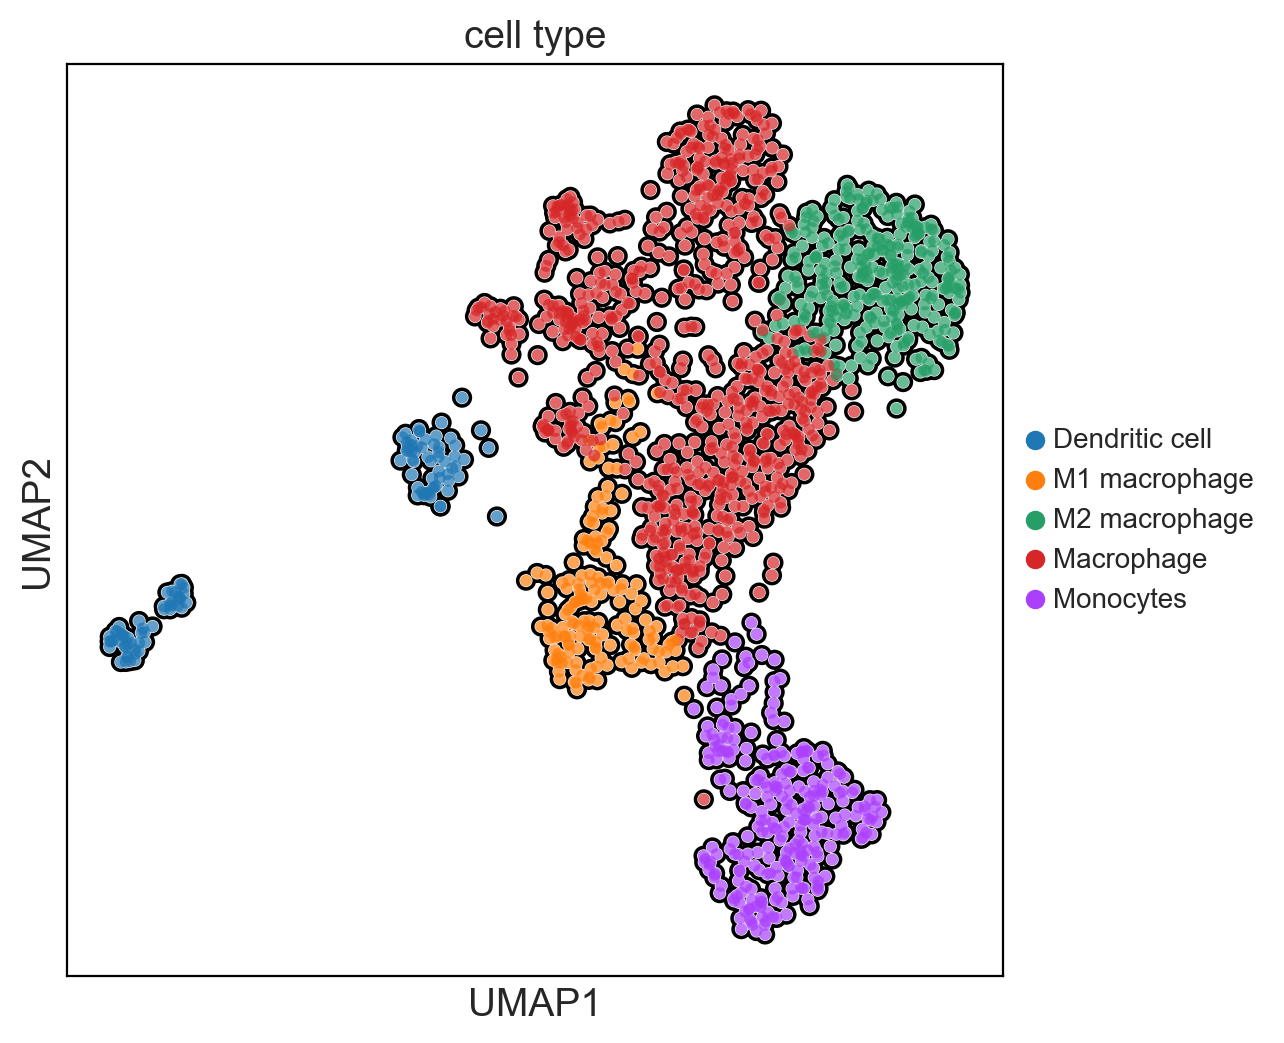

In [72]:
sc.settings.set_figure_params(dpi=100,dpi_save=600,figsize=(6,6))
mac.obs["cell type"] =mac.obs["cell type"].astype('category')
sc.pl.umap(mac, color='cell type',add_outline=True, legend_loc='right margin',
               legend_fontsize=10, legend_fontoutline= 1,frameon= True,save='Macrophage.pdf')

In [62]:
mac.obs['cell type'].value_counts()

Macrophage        758
M2 macrophage     317
Monocytes         280
M1 macrophage     170
Dendritic cell    112
Name: cell type, dtype: int64

In [81]:
def draw_population_ratio(df:pd.DataFrame, x:str, y:str,
                          * ,data_colors:dict=None,
                          normalize=True,
                          path=None,
                          legend=True,
                          figsize=(6, 3)):
    df = df[[x, y]]
    x_items = df[x].cat.categories.tolist()
    y_items = df[y].cat.categories.tolist()
    y_dict = df[y].value_counts().to_dict()
    
    heights = []
    for x_item in x_items:
        tmp_result = []
        x_item_counter = df[df[x]==x_item][y].value_counts().to_dict()
        for y_item in y_items:
            tmp_result.append(x_item_counter.get(y_item, 0))
        heights.append(tmp_result)
    heights = np.asarray(heights)
    if normalize:
        heights = heights/np.sum(heights, axis=0)
    heights = (heights.T/np.sum(heights, axis=1)).T
    plt.figure(figsize=figsize)
    _last = np.matrix([0.]* heights.shape[0])
    for i, y_item in enumerate(y_items):
        p = plt.bar(range(0, heights.shape[0]), heights[:, i],
                    bottom=np.asarray(_last)[0],
                    color=data_colors.get(y_item, 'b'),
                    label=y_item
                   )
        _last = _last + np.matrix(heights[:, i])
    plt.xticks(range(0, len(x_items)),labels=x_items, rotation=70)
    plt.ylim((0, 1))
    if legend:
        plt.legend()
        ax = plt.gca()
        ax.legend(bbox_to_anchor=(0.65, 0, 0.7, 1))
    if path is not None:
        plt.savefig(path, dpi=600)

In [64]:

mac.obs['Tissue'] = mac.obs.Tissue.astype('category')

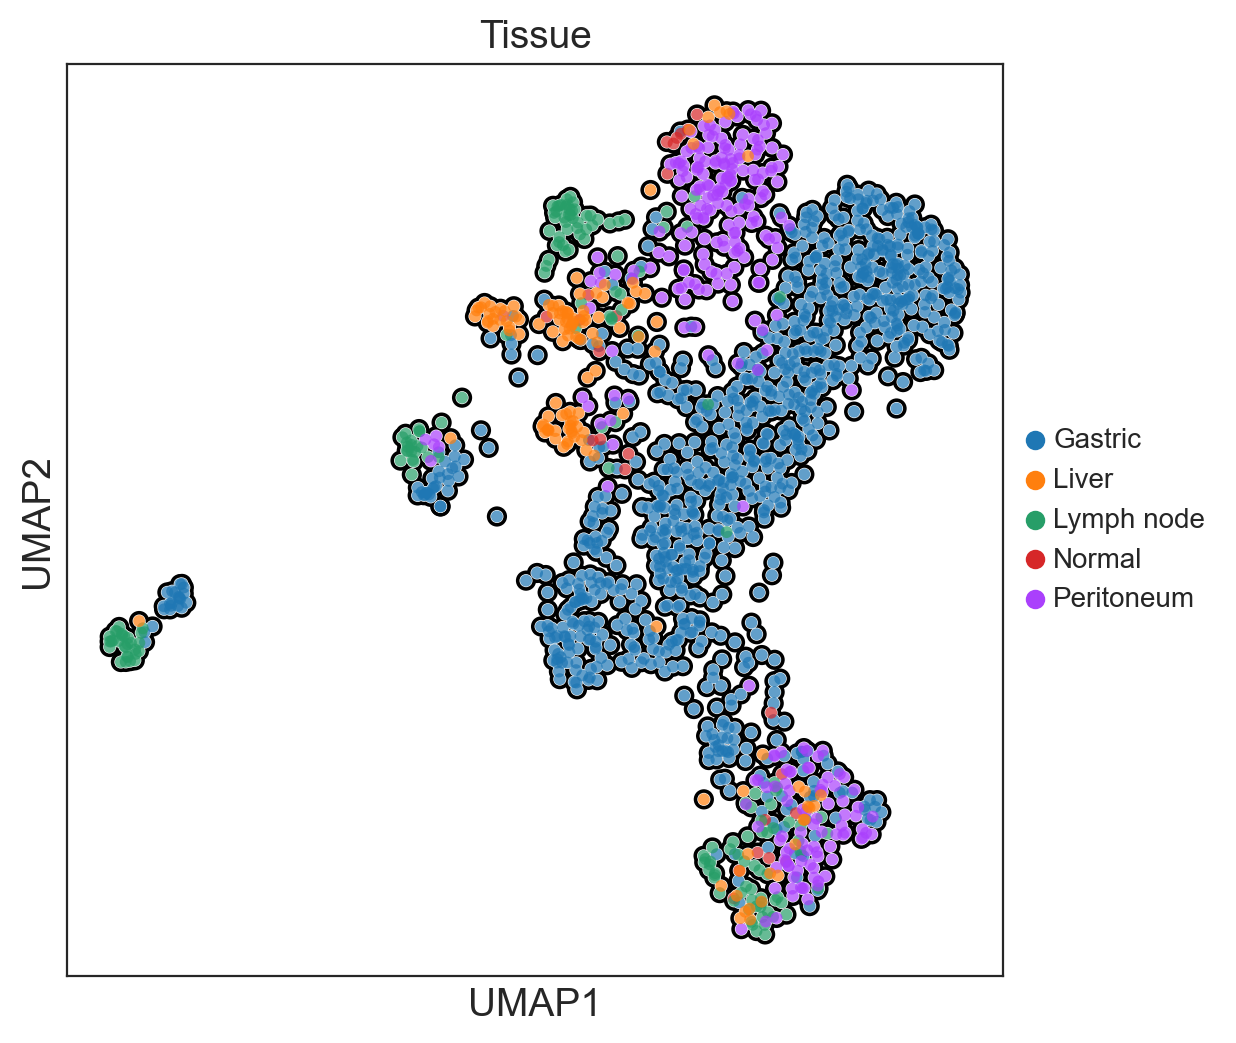

In [75]:
sc.pl.umap(mac, color='Tissue',add_outline=True, legend_loc='right margin',
               legend_fontsize=10, legend_fontoutline= 1,frameon= True)

In [85]:
mac.obs['cell type'].value_counts()

Macrophage        758
M2 macrophage     317
Monocytes         280
M1 macrophage     170
Dendritic cell    112
Name: cell type, dtype: int64

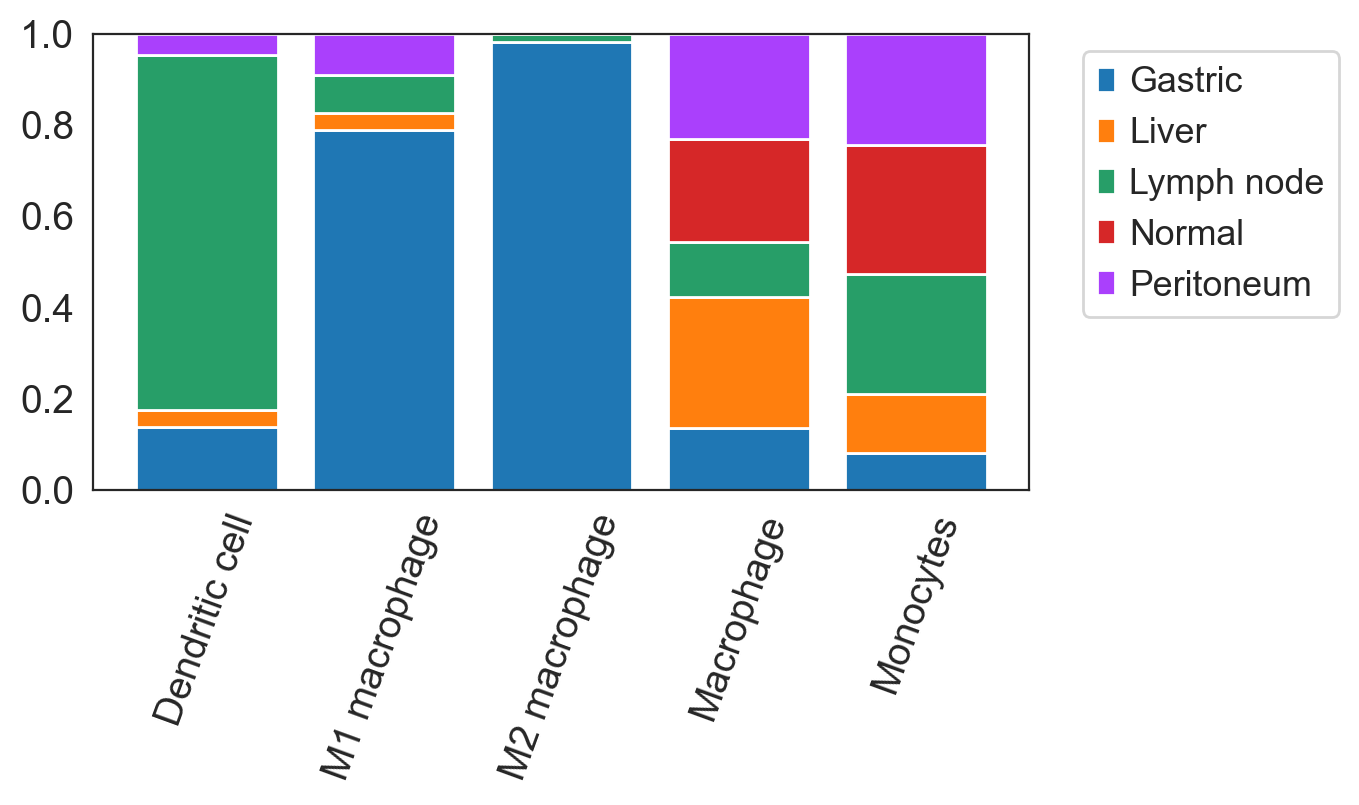

In [82]:
sns.set_style('white')
draw_population_ratio(mac.obs, x='cell type', y='Tissue',
                      data_colors=dict(zip(mac.obs.Tissue.cat.categories, mac.uns['Tissue_colors']))
                     )

In [2]:
!pip install squidpy 

  Created wheel for dask-image: filename=dask_image-2021.12.0-py2.py3-none-any.whl size=41049 sha256=758d0d878b73b1b9e2453e667d4c0f50be81a4fda1dd88f147fba3052accd678
  Stored in directory: c:\users\scholar\appdata\local\pip\cache\wheels\4b\09\2c\6c6746b9ae12023073732659be8a9c8d6e5476d8cbad37efb8
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=49293acc34e6cd580804cc8145f382aba5a07018d427b2bf401e2a6b95f23c4a
  Stored in directory: c:\users\scholar\appdata\local\pip\cache\wheels\e5\f0\3f\17394a03ed36922f620186a5a9ebd6bce2b4579020243c7a68
  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=83692 sha256=552e8dab49f623e2e2dba75f8df8ed29afda04fdddf7324242c57db8de2851a7
  Stored in directory: c:\users\scholar\appdata\local\pip\cache\wheels\c8\51\78\e8155864f53ff0c9e01fe656f64b55712ba60fb2a451757505
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=900b5e5e1f64f55188369d7085ccae767656189d58ebd10c30a

In [3]:
import squidpy as sq

In [ ]:
sq.